# Setup

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import lib_dataimport
import lib_processing
import importlib
lib_dataimport = importlib.reload(lib_dataimport)
lib_processing = importlib.reload(lib_processing)

In [19]:
# Graphics stuff

def darkmode(foreground="0.85", background="0.15"):
	''' Switch on darkmode. Foreground and background colours may also be specified explicitly. '''
	_set_fgbg(fg=foreground, bg=background)

def lightmode(foreground="0", background="1.0"):
	''' Switch on lightmode. Foreground and background colours may also be specified explicitly. '''
	_set_fgbg(fg=foreground, bg=background)


#############################
# Internal helper functions #
#############################

def _set_fgbg(fg, bg):
	plt.rcParams.update({
		"lines.color": fg,
		"patch.edgecolor": fg,
		"text.color": fg,
		"axes.facecolor": bg,
		"axes.edgecolor": fg,
		"axes.labelcolor": fg,
		"xtick.color": fg,
		"ytick.color": fg,
		"grid.color": fg,
		"figure.facecolor": bg,
		"figure.edgecolor": bg,
		"savefig.facecolor": bg,
		"savefig.edgecolor": bg})
    
darkmode()

In [7]:
# Data import
df = lib_dataimport.read_data()
assert len(df) == 963

# Analysis

In [68]:
# Fit the bag-of-words model
words, word_frequencies = lib_processing.bag_of_words(df,
        n_gram_n=1,
        min_word_length=3,
        normalise_counts=False,
        binary=False)
assert len(words) > 100

# Compute cosine similarity matrix
cosinesim_matrix = lib_processing.cosinesim(word_frequencies)
assert np.shape(cosinesim_matrix)

Text(42.0, 0.5, 'Letter Nb.')

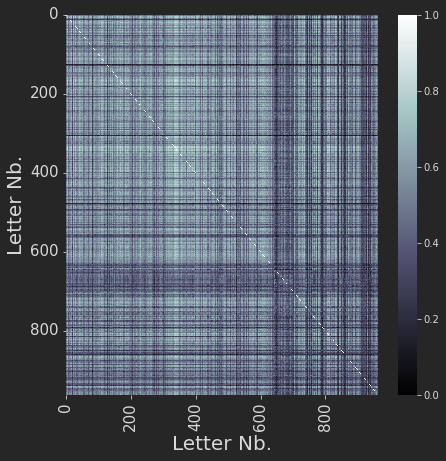

In [71]:
# Plot cosine-similarity matrix
fig, ax = plt.subplots(1,1,figsize=(7,7))
sns.heatmap(cosinesim_matrix, ax=ax, cmap="bone")

# Aesthetics
ax.set_xticks([0,200,400,600,800]);
ax.set_xticklabels([0,200,400,600,800])
ax.set_yticks([0,200,400,600,800]);
ax.set_yticklabels([0,200,400,600,800]);
ax.tick_params(axis="both", which="both", labelsize=15)
ax.set_xlabel("Letter Nb.", fontsize=20)
ax.set_ylabel("Letter Nb.", fontsize=20)

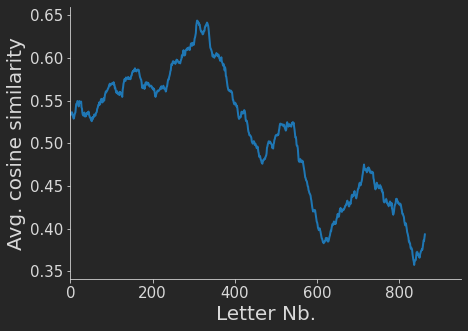

In [72]:
# We now slide a window of size 'window_size' over the 963 letters
# and compute the average pairwise cosine similarity 
window_size = 100

avg_similarities = []
se_similarities = []
nb_letter = range(0, len(cosinesim_matrix)-window_size)
for i in nb_letter:
    # Extract the similarity values from the triangular submatrix
    # from i to i+windowsize, excluding the 1s on diagonal
    submatrix = cosinesim_matrix[i:i+window_size,i:i+window_size]
    similarities = submatrix[np.triu_indices(window_size, k=1)]
    
    # Compute avg and sem
    avg_similarities.append(np.mean(similarities))
    se_similarities.append(sp.stats.sem(similarities))
avg_similarities = np.array(avg_similarities)
se_similarities = np.array(se_similarities)

# Generate plot and make visually more pleasing
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_xlim((0,950))
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Avg. cosine similarity", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.plot(nb_letter, avg_similarities, lw=2)
ax.fill_between(nb_letter, avg_similarities-se_similarities, avg_similarities+se_similarities, alpha=.5)

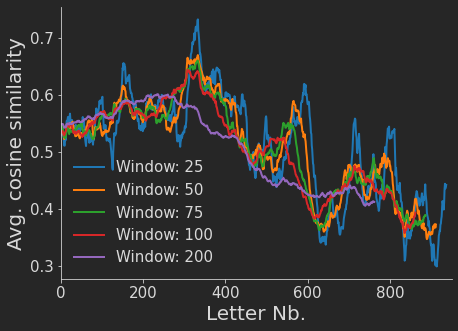

In [73]:
# Comparing different window_sizes
window_sizes = [25, 50, 75, 100, 200]

# Generate plot
fig, ax = plt.subplots(1,1,figsize=(7,5))

# Generate curves for different window_sizes
for window_size in window_sizes:
    avg_similarities = []
    se_similarities = []
    nb_letter = range(0, len(cosinesim_matrix)-window_size)
    for i in nb_letter:
        # Extract the similarity values from the triangular submatrix
        # from i to i+windowsize, excluding the 1s on diagonal
        submatrix = cosinesim_matrix[i:i+window_size,i:i+window_size]
        similarities = submatrix[np.triu_indices(window_size, k=1)]

        # Compute avg and sem
        avg_similarities.append(np.mean(similarities))
        se_similarities.append(sp.stats.sem(similarities))
    avg_similarities = np.array(avg_similarities)
    se_similarities = np.array(se_similarities)
    ax.plot(nb_letter, avg_similarities, lw=2, label="Window: "+str(window_size))

# Make plot visually more pleasing
ax.set_xlim((0,950))
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Avg. cosine similarity", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.fill_between(nb_letter, avg_similarities-se_similarities, avg_similarities+se_similarities, alpha=.5)
ax.legend(loc=3, frameon=False, fontsize=15)
# Trend seems to be robust to changes in window_size